In [1]:
import random

In [2]:
outcomes = []
p_plus = 1
mdb_plus = 1

class holder():
    def __init__(self):
        self.p_plus = 1000
        self.mdb_plus = 0
    def inferno(self, p_plus = p_plus, mdb_plus = mdb_plus):
        value = self.p_plus * p_plus
        if value > 0:
            value = value * .94
            self.mdb_plus = (value / mdb_plus)
            self.p_plus = 0
    def buy_back(self, p_plus = p_plus, mdb_plus = mdb_plus):
        value = self.mdb_plus * mdb_plus
        value = value * .98
        self.p_plus = (value / p_plus)
        self.mdb_plus = 0
    def __repr__(self):
        return("MDB+: {0}\nP+: {1}".format(self.mdb_plus, self.p_plus))
        
def update_prices(p_plus, mdb_plus):
    #Multiplyers derived from APY to APR calculator
    p_plus = p_plus * (1.0046)
    mdb_plus = mdb_plus * (1.0009)
    return(p_plus, mdb_plus)
    
def strategy1(holder):
    p_plus = 1
    mdb_plus = 1
    for i in range(0, 365):
        p_plus, mdb_plus = update_prices(p_plus, mdb_plus)
        if not random.randint(0,20):
            holder.inferno(p_plus, mdb_plus)
            holder.buy_back(p_plus, mdb_plus)
        if p_plus < mdb_plus:
            raise ValueError("What the fuck")
    if holder.mdb_plus > 0:
        holder.buy_back(p_plus, mdb_plus)
    return(holder)
    
        

In [26]:
l1 = []
for i in range(100000):
    hodler = holder()
    l1.append(strategy1(hodler))
l1 = sorted(l1,key = lambda x: x.p_plus)
values = []
for i in range(len(l1)):
    values.append(l1[i].p_plus)
print('Top holder: {0}\nBottom Holder: {1}\nMedian Holder: {2}\nAvg Holder: {3} '.format(l1[-1], l1[0], (l1[int(len(l1)/2)]),(sum(values)/len(values))))


Top holder: MDB+: 0
P+: 781.7390161279998
Bottom Holder: MDB+: 0
P+: 44.20275244380472
Median Holder: MDB+: 0
P+: 247.75178830725915
Avg Holder: 


Text(0.5, 0, '365 days of P+ auto-rebuy')

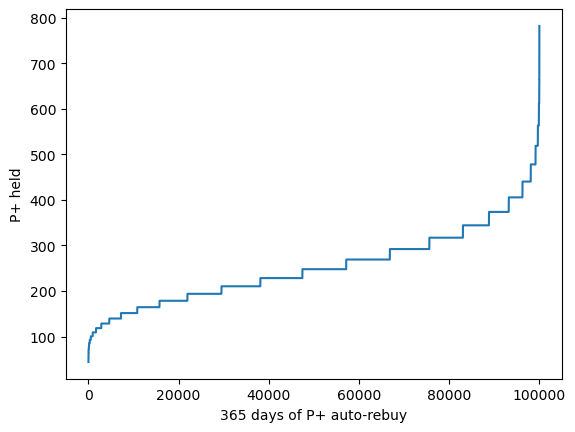

In [27]:
plt.plot(values)
plt.ylabel('P+ held')
plt.xlabel('365 days of P+ auto-rebuy')
